In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px


In [132]:
df = pd.read_csv("/content/mental-health-students.csv")

Turning the Timestamp into DateTime object, extracting the date from it and dropping the time

In [133]:
df.head()

,Timestamp,Choose your gender,Age,Your current year of Study,What is your CGPA?,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,year 1,3.00 - 3.49,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,year 2,3.00 - 3.49,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,Year 1,3.00 - 3.49,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,year 3,3.00 - 3.49,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,year 4,3.00 - 3.49,No,No,No,No


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           101 non-null    object 
 1   Gender         101 non-null    object 
 2   Age            101 non-null    int64  
 3   Year of Study  101 non-null    int64  
 4   Depression     101 non-null    object 
 5   Anxiety        101 non-null    object 
 6   Panic Attack   101 non-null    object 
 7   Treatment      101 non-null    object 
 8   CGPA           101 non-null    float64
dtypes: float64(1), int64(2), object(6)
memory usage: 7.2+ KB


In [4]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors="coerce")
df['Date'] = df['Timestamp'].dt.date

In [5]:
df.drop('Timestamp', axis=1, inplace=True)

In [9]:
df['Date'] = df['Date'].apply(lambda x: x.replace(year=2023))


Changing the name of the coloumns into smaller and more compact names and also changing the order of the columns for better readability

In [6]:
df.columns

Index(['Choose your gender', 'Age', 'Your current year of Study',
       'What is your CGPA?', 'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?', 'Date'],
      dtype='object')

In [7]:
df.columns = ['Gender', "Age", "Year of Study", 'CGPA', "Depression", "Anxiety", "Panic Attack", "Treatment", "Date"]

In [8]:
df.head(3)

,Gender,Age,Year of Study,CGPA,Depression,Anxiety,Panic Attack,Treatment,Date
0,Female,18.0,year 1,3.00 - 3.49,Yes,No,Yes,No,2020-08-07
1,Male,21.0,year 2,3.00 - 3.49,No,Yes,No,No,2020-08-07
2,Male,19.0,Year 1,3.00 - 3.49,Yes,Yes,Yes,No,2020-08-07


In [10]:
change_column = ["Date", 'Gender', "Age", "Year of Study", "Depression", "Anxiety", "Panic Attack", "Treatment", "CGPA"]
df = df.reindex(columns=change_column)
df.head(3)


,Date,Gender,Age,Year of Study,Depression,Anxiety,Panic Attack,Treatment,CGPA
0,2023-08-07,Female,18.0,year 1,Yes,No,Yes,No,3.00 - 3.49
1,2023-08-07,Male,21.0,year 2,No,Yes,No,No,3.00 - 3.49
2,2023-08-07,Male,19.0,Year 1,Yes,Yes,Yes,No,3.00 - 3.49


Looking for missing values, if found any - filling them

In [11]:
df.isnull().sum()

Date             0
Gender           0
Age              1
Year of Study    0
Depression       0
Anxiety          0
Panic Attack     0
Treatment        0
CGPA             0
dtype: int64

In [12]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [13]:
df['Age'] = df['Age'].astype(int)

Cleaning the CGPA Data and getting only value instead of an object

In [14]:
df["CGPA"][3]

'3.00 - 3.49'

In [16]:


df['CGPA'] = df['CGPA'].str.replace(r' - \d+\.\d+$', '', regex=True)
df['CGPA'] = df['CGPA'].str.replace(r'- 4.00 ', '', regex=True)





In [18]:
df["CGPA"] = df["CGPA"].astype(float)

Cleaing the Column "Year of Study" and removing the strings in the column

In [20]:
df['Year of Study'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [21]:
df['Year of Study'] = df['Year of Study'].replace({'year 1': 1, 'Year 1': 1, "year 2": 2, 'Year 2': 2, 'year 3': 3, 'Year 3': 3, 'Year 4': 4, "year 4": 4})


In [22]:
df['Year of Study'].unique()

array([1, 2, 3, 4])

Loeading the Second Dataset

In [23]:
df_excel = pd.read_excel("/content/mental-health.xlsx")

Making blankspaces from the column headings, so, we don't go into trouble when calling for columns later

In [24]:
df_excel.rename(columns={'Anxiety ': 'Anxiety'}, inplace=True)
df_excel.rename(columns={'Year of Study ': 'Year of Study'}, inplace=True)

In [25]:
df_excel.head()

,Date,Gender,Age,Year of Study,Depression,Anxiety,Panic Attack,Treatment,CGPA
0,2022-08-07,0,26,year 2,1,1,1,1,5.7
1,2022-08-07,0,22,year 2,0,1,0,0,4.2
2,2022-08-07,1,21,year 3,0,0,0,0,8.4
3,2022-08-07,0,33,year 1,0,0,0,0,8.3
4,2022-08-07,0,34,year 1,0,1,1,0,5.7


Changing the values of dataframe into string, so both the files are compatible when we concanete them

In [26]:
df_excel['Gender'] = df_excel['Gender'].replace({0 : 'Female', 1 : 'Male'})
df_excel['Depression'] = df_excel['Depression'].replace({0 : 'No', 1: 'Yes'})

df_excel['Panic Attack'] = df_excel['Panic Attack'].replace({0: 'No', 1: 'Yes'})

df_excel['Treatment'] = df_excel['Treatment'].replace({0: 'No' ,1: 'Yes'})
df_excel['Anxiety'] = df_excel['Anxiety'].replace({0: 'No' ,1: 'Yes'})
df_excel['Year of Study'] = df_excel['Year of Study'].replace({'year 1': 1, 'year 2': 2, 'year 3': 3, 'year 4': 4})

In [27]:
df_excel.head()

,Date,Gender,Age,Year of Study,Depression,Anxiety,Panic Attack,Treatment,CGPA
0,2022-08-07,Female,26,2,Yes,Yes,Yes,Yes,5.7
1,2022-08-07,Female,22,2,No,Yes,No,No,4.2
2,2022-08-07,Male,21,3,No,No,No,No,8.4
3,2022-08-07,Female,33,1,No,No,No,No,8.3
4,2022-08-07,Female,34,1,No,Yes,Yes,No,5.7


In [28]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           69 non-null     datetime64[ns]
 1   Gender         69 non-null     object        
 2   Age            69 non-null     int64         
 3   Year of Study  69 non-null     int64         
 4   Depression     69 non-null     object        
 5   Anxiety        69 non-null     object        
 6   Panic Attack   69 non-null     object        
 7   Treatment      69 non-null     object        
 8   CGPA           68 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 5.0+ KB


In [29]:

df_excel.isnull().sum()

Date             0
Gender           0
Age              0
Year of Study    0
Depression       0
Anxiety          0
Panic Attack     0
Treatment        0
CGPA             1
dtype: int64

In [30]:

df["CGPA"] = df["CGPA"].astype(float)


In [31]:
df['CGPA']

0      7.50
1      7.50
2      7.50
3      7.50
4      7.50
       ... 
96     8.75
97     7.50
98     8.75
99     8.75
100    7.50
Name: CGPA, Length: 101, dtype: float64

Concataning both the dataframe into one, so we can work on them together

In [32]:
data = pd.concat([df, df_excel], ignore_index=True)

In [33]:
data.head(3)

,Date,Gender,Age,Year of Study,Depression,Anxiety,Panic Attack,Treatment,CGPA
0,2023-08-07,Female,18,1,Yes,No,Yes,No,7.5
1,2023-08-07,Male,21,2,No,Yes,No,No,7.5
2,2023-08-07,Male,19,1,Yes,Yes,Yes,No,7.5


In [34]:
df['Date'] = pd.to_datetime(df['Date'], errors="coerce")
df['Date'] = df['Date'].dt.date

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           170 non-null    object 
 1   Gender         170 non-null    object 
 2   Age            170 non-null    int64  
 3   Year of Study  170 non-null    int64  
 4   Depression     170 non-null    object 
 5   Anxiety        170 non-null    object 
 6   Panic Attack   170 non-null    object 
 7   Treatment      170 non-null    object 
 8   CGPA           169 non-null    float64
dtypes: float64(1), int64(2), object(6)
memory usage: 12.1+ KB


Checking for missing values in the dataframe and filling them

In [36]:
data.describe(include="object")

<ipython-input-36-b6cc826373d1>:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  data.describe(include="object")


,Date,Gender,Depression,Anxiety,Panic Attack,Treatment
count,170,170,170,170,170,170
unique,49,2,2,2,2,2
top,2023-08-07,Female,No,No,No,No
freq,73,118,120,97,130,156


In [134]:
df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [38]:
data.isnull().sum()

Date             0
Gender           0
Age              0
Year of Study    0
Depression       0
Anxiety          0
Panic Attack     0
Treatment        0
CGPA             1
dtype: int64

In [39]:
data['CGPA'].fillna(data['CGPA'].mean(), inplace=True)

In [40]:
data["Year of Study"] = data["Year of Study"].astype(str)

**DATA ANALYSIS**

Exploring the Data first, before we try to get any insights into the data


1.   In the first *Section 1* we see the occurance of each value
2.   In the second *Section 2* we see the occurance of each value in relation to the other Values
3. In the Third Section 3 we try to get insights inte the data





Section 1
1. Number of Men Vs Women
2. Number of Students from a particular Year
3. Students Suffering from Anxiety
4. Students Suffering from Depression
5. Students Suffering from Panic Attack
6. Students taking any form of treatment
7. Students Age

1. Number of Men Vs Women


In [41]:
px.pie(data, names="Gender", title="Men Vs Women")

Students from a particular year

In [42]:

px.pie(data, names="Year of Study", title="Year of Study")

Students suffering from anxiety

In [43]:

px.pie(data, names="Anxiety", title="Anxiety")



Students from Depression

In [44]:
px.pie(data, names="Depression", title="Depression")


Students Suffering from Panic Attack

In [45]:
px.pie(data, names="Panic Attack", title="Panic Attack")


Students getting any form of treatment

In [46]:
px.pie(data, names="Treatment", title="Treatment")

Students Age


<Axes: xlabel='Age', ylabel='Count'>

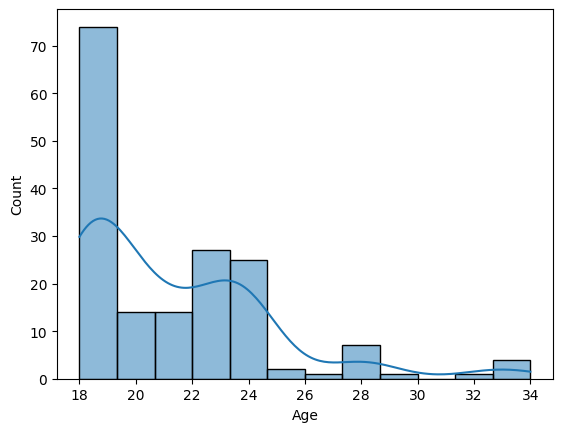

In [47]:
fig = sns.histplot(data, x="Age", kde=True)
fig

Section 2

1. Age vs Depression
2. Study year vs Depression
3. Study year vs Anxiety
4. Students having Depression & Anxiety and them getting treatment(Men vs Women)
5. Study year vs Students getting treatment

In [48]:
# data['Gender'] = data['Gender'].replace({'Female': 0, 'Male': 1})
# data['Depression'] = data['Depression'].replace({'No': 0, 'Yes': 1})
# data['Anxiety'] = data['Anxiety'].replace({'No': 0, 'Yes': 1})

# data['Panic Attack'] = data['Panic Attack'].replace({'No': 0, 'Yes': 1})

# data['Treatment'] = data['Treatment'].replace({'No': 0, 'Yes': 1})

Age vs Depression

In [49]:
data[data['Depression'] == 'Yes'].count()

Date             50
Gender           50
Age              50
Year of Study    50
Depression       50
Anxiety          50
Panic Attack     50
Treatment        50
CGPA             50
dtype: int64

In [135]:
grouped = data.groupby(['Age', 'Depression']).size().reset_index(name='Count')

# Create a grouped bar chart using Plotly Express
fig = px.bar(grouped, x='Age', y='Count', color='Depression', labels={'Count': 'Frequency'},
             title='Relationship Between Age and Depression',
             )
fig

Study year and students suffering from Depression and Anxiety


In [51]:
depression_data = data[data['Depression'] == 'Yes']
dep = {1 : 0, 2 : 0, 3: 0, 4: 0}
dep[1] = depression_data[depression_data["Year of Study"] == '1'].count()[0]
dep[2] = depression_data[depression_data["Year of Study"] == '2'].count()[0]
dep[3] = depression_data[depression_data["Year of Study"] == '3'].count()[0]
dep[4] = depression_data[depression_data["Year of Study"] == '4'].count()[0]
dep

{1: 16, 2: 15, 3: 14, 4: 5}

In [140]:
anxiety_data = data[data['Anxiety'] == 'Yes']
anx = {1 : 0, 2 : 0, 3: 0, 4: 0}
anx[1] = anxiety_data[anxiety_data["Year of Study"] == '1'].count()[0]
anx[2] = anxiety_data[anxiety_data["Year of Study"] == '2'].count()[0]
anx[3] = anxiety_data[anxiety_data["Year of Study"] == '3'].count()[0]
anx[4] = anxiety_data[anxiety_data["Year of Study"] == '4'].count()[0]
anx

{1: 27, 2: 18, 3: 17, 4: 11}

"Year of Study vs Depression"

In [93]:
fig = px.histogram(data, x="Year of Study" , color="Depression", nbins=4, title= "Year of Study vs Depression")
fig.update_layout(bargap=0.2)


"Year of Study vs Anxiety"

In [53]:
fig = px.histogram(data, x="Year of Study" , color="Anxiety", nbins=4, title="Year of Study vs Anxiety")
fig.update_layout(bargap=0.2)


how many who have Depression and Anxiety and Panic Attacks taking treatment?




In [141]:
data[data["Treatment"] == 'Yes'].count()[0]

14

In [142]:
depression_data[depression_data["Treatment"] == 'Yes'].count()[0]

11

In [143]:
anxiety_data[anxiety_data["Treatment"] == 'Yes'].count()[0]

9

In [144]:
dep_anx = data[(data['Depression'] == 'Yes') & (data['Anxiety'] == 'Yes')]
dep_anx.count()[0]

28

In [145]:
dep_anx_pan = data[(data['Depression'] == 'Yes') & (data['Anxiety'] == 'Yes') & (data['Panic Attack'] == "Yes")]
dep_anx_pan.count()[0]

13

In [146]:
data[data["Treatment"] == 'No'].count()

Date             156
Gender           156
Age              156
Year of Study    156
Depression       156
Anxiety          156
Panic Attack     156
Treatment        156
CGPA             156
dtype: int64

In [148]:
dep_anx[dep_anx["Treatment"] == 'No'].count()

Date             22
Gender           22
Age              22
Year of Study    22
Depression       22
Anxiety          22
Panic Attack     22
Treatment        22
CGPA             22
dtype: int64

In [59]:
dep_anx[dep_anx["Treatment"] == 'Yes'].count()

Date             6
Gender           6
Age              6
Year of Study    6
Depression       6
Anxiety          6
Panic Attack     6
Treatment        6
CGPA             6
dtype: int64

In [60]:
dep_anx_pan[dep_anx_pan["Treatment"] == "Yes"].count()

Date             2
Gender           2
Age              2
Year of Study    2
Depression       2
Anxiety          2
Panic Attack     2
Treatment        2
CGPA             2
dtype: int64

(Men vs Women) getting Treatment

In [61]:

fig = px.histogram(data, x="Gender", color="Treatment", title="(Men vs Women) getting Treatment")
fig.update_layout(barmode='group')

Who gets more treatment? which year?

Study Year vs Treatment

In [62]:

fig = px.histogram(data, x="Year of Study", color="Treatment", title="Study Year vs Treatment")
fig.update_layout(barmode='group')

In [98]:
data['Gender'] = data['Gender'].replace({'Female': 0, 'Male': 1})
data['Depression'] = data['Depression'].replace({'No': 0, 'Yes': 1})
data['Anxiety'] = data['Anxiety'].replace({'No': 0, 'Yes': 1})

data['Panic Attack'] = data['Panic Attack'].replace({'No': 0, 'Yes': 1})

data['Treatment'] = data['Treatment'].replace({'No': 0, 'Yes': 1})

data['Gender'] = data['Gender'].astype(int)
data['Depression'] = data['Depression'].astype(int)
data['Anxiety'] = data['Anxiety'].astype(int)
data['Panic Attack'] = data['Panic Attack'].astype(int)
data['Treatment'] = data['Treatment'].astype(int)

<ipython-input-100-b699050ce883>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

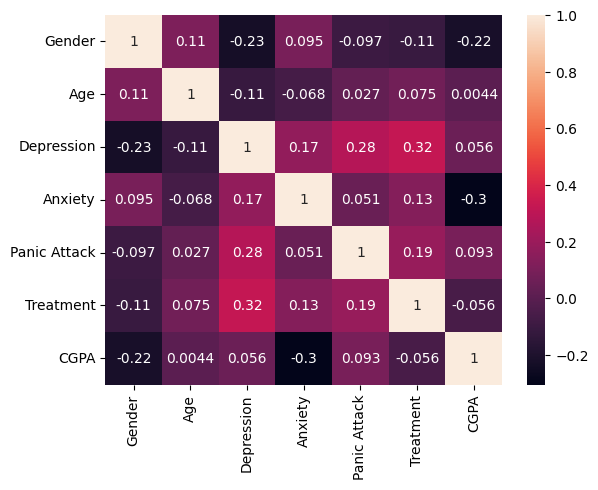

In [100]:
sns.heatmap(data.corr(), annot=True)

In [101]:
data['Gender'] = data['Gender'].replace({0: 'Male', 1: 'Female'})
data['Depression'] = data['Depression'].replace({0: 'No', 1: 'Yes'})
data['Anxiety'] = data['Anxiety'].replace({0: 'No', 1: 'Yes'})
data['Panic Attack'] = data['Panic Attack'].replace({0: 'No', 1: 'Yes'})
data['Treatment'] = data['Treatment'].replace({0: 'No', 1: 'Yes'})


**Section 3**



1.   Distribution of CGPA by Gender
2.   Distribution of CGPA by Year of Study
3.   Do people suffering from Depression Score less
4.   Do people suffering from Anxiety Score less
5.   Do students getting treatment more than people who are not
6.   Does Mental issues affect Gender in a different way, and its relation with CGPA

Now analysis about CGPA and its relation with Mental Health

In [102]:
fig = px.histogram(data, x="CGPA", color="Gender",
                   marginal="box", # or violin, rug
                   hover_data=data.columns, title="Distribution of CGPA by Gender")
fig

Distribution of CGPA by Year of Study

In [103]:
fig = px.scatter(data, x="Year of Study", y="CGPA", color="Gender",
                   hover_data=data.columns, title="Distribution of CGPA by Year of Study")
fig

3.   Do people suffering from Depression Score less






In [104]:
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

In [105]:
dep_no = data[data["Depression"] == 'No']
dep_no.count()

Date             120
Gender           120
Age              120
Year of Study    120
Depression       120
Anxiety          120
Panic Attack     120
Treatment        120
CGPA             120
dtype: int64

In [106]:
dep_no = data[data["Depression"] == 'No']
dep_no['CGPA'].median()

7.5

In [107]:
depression_data.count()[0]

50

In [108]:
depression_data[depression_data["CGPA"] > 7.5].count()[0]

13

In [109]:
anxiety_data["CGPA"].median()

nan

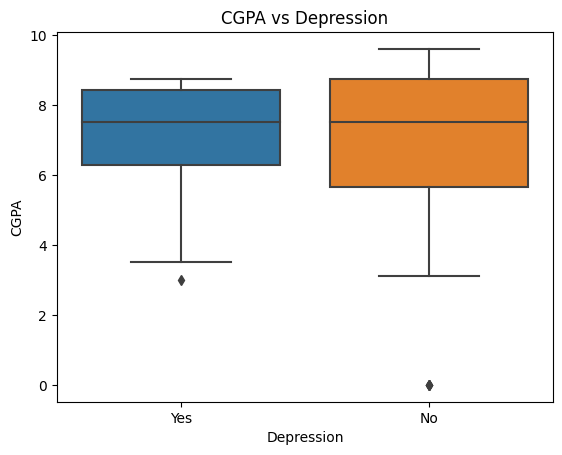

In [110]:
sns.boxplot(x='Depression', y='CGPA', data=data)
plt.title('CGPA vs Depression')
plt.show()

In [111]:
t_stat, p_value = ttest_ind(depression_data["CGPA"], dep_no["CGPA"])

In [112]:
if p_value < 0.05:
    print(f'There is a statistically significant difference in CGPA between depressed and not depressed individuals (p-value: {p_value}).')
else:
    print(f'There is no statistically significant difference in CGPA between depressed and not depressed individuals (p-value: {p_value}).')

There is no statistically significant difference in CGPA between depressed and not depressed individuals (p-value: 0.47109765025077754).


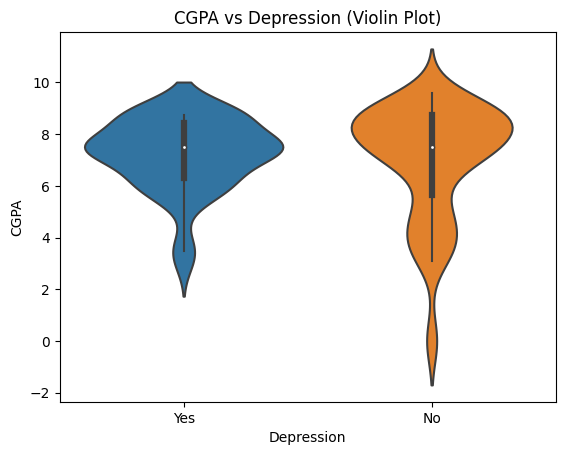

In [113]:
sns.violinplot(x='Depression', y='CGPA', data=data)
plt.title('CGPA vs Depression (Violin Plot)')
plt.show()

3.   Do people suffering from Anxiety Score less




In [114]:
anx_no = data[data["Anxiety"] == "No"]
anx_no.count()[0]

anx_no["CGPA"].median()

7.5

In [115]:
anxiety_data['CGPA'].median()

nan

In [116]:
anxiety_data.count()

Date             0
Gender           0
Age              0
Year of Study    0
Depression       0
Anxiety          0
Panic Attack     0
Treatment        0
CGPA             0
dtype: int64

In [117]:
t_stat, p_value = ttest_ind(anxiety_data["CGPA"], anx_no["CGPA"])
if p_value < 0.05:
    print(f'There is a statistically significant difference in CGPA between Students suffering from anxiety and Students not suffering from anxiety(p-value: {p_value}).')
else:
    print(f'There is no statistically significant difference in CGPA between the groups (p-value: {p_value}).')

There is no statistically significant difference in CGPA between the groups (p-value: nan).


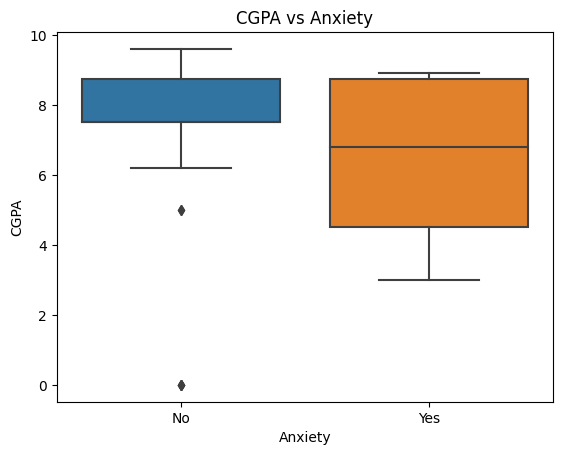

In [118]:
sns.boxplot(x='Anxiety', y='CGPA', data=data)
plt.title('CGPA vs Anxiety')
plt.show()


Do students getting treatment score more than people who are *not*

---



In [119]:
depression_and_anxiety_treatment = dep_anx[dep_anx["Treatment"] == "Yes"]
depression_and_anxiety_no_treatment = dep_anx[dep_anx["Treatment"] == "No"]

In [120]:
depression_and_anxiety_treatment.count()[0]

6

In [121]:
depression_and_anxiety_no_treatment.count()[0]

22

In [122]:
t_stat, p_value = ttest_ind(depression_and_anxiety_treatment['CGPA'], depression_and_anxiety_no_treatment['CGPA'])

if p_value < 0.05:
    print(f'There is a statistically significant difference in CGPA between the treatment and no-treatment groups (p-value: {p_value}).')
else:
    print(f'There is no statistically significant difference in CGPA between the treatment and no-treatment groups ( (p-value: {p_value}).')

There is no statistically significant difference in CGPA between the treatment and no-treatment groups ( (p-value: 0.7383723404465734).


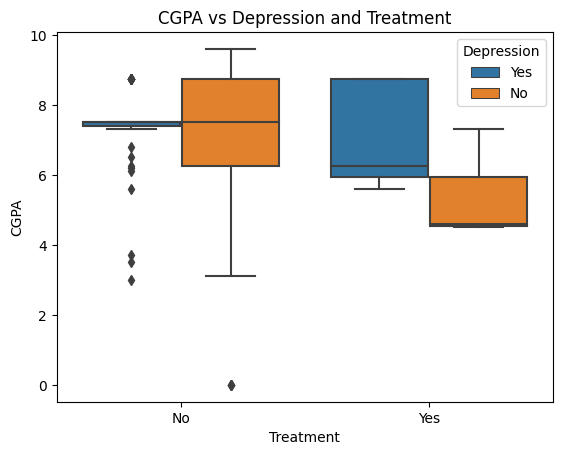

In [123]:
sns.boxplot(x='Treatment', y='CGPA', data=data, hue='Depression')
plt.title('CGPA vs Depression and Treatment')
plt.show()

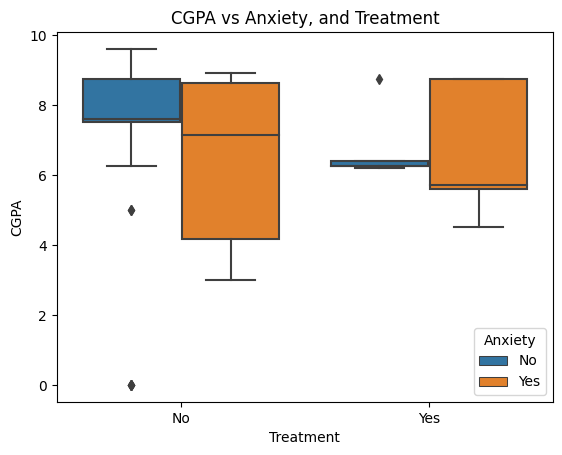

In [124]:
sns.boxplot(x='Treatment', y='CGPA', data=data, hue='Anxiety')
plt.title('CGPA vs Anxiety, and Treatment')
plt.show()

6.   Does Mental issues affect Gender in a different way, and its relation with CGPA

In [125]:
f_stat, p_value = f_oneway(
    depression_data[depression_data['Gender'] == 'Male']['CGPA'],
    depression_data[depression_data['Gender'] == 'Female']['CGPA'],
    dep_no[dep_no['Gender'] == 'Male']['CGPA'],
    dep_no[dep_no['Gender'] == 'Female']['CGPA']
)

if p_value < 0.05:
    print(f'There is a statistically significant difference in CGPA among different groups (p-value: {p_value}).')
else:
    print(f'There is no statistically significant difference in CGPA among different groups (p-value: {p_value}).')







There is a statistically significant difference in CGPA among different groups (p-value: 0.02399196377881781).


In [126]:
depression_data[depression_data["Gender"] == "Male"].count()

Date             7
Gender           7
Age              7
Year of Study    7
Depression       7
Anxiety          7
Panic Attack     7
Treatment        7
CGPA             7
dtype: int64

In [127]:
depression_data[depression_data["Gender"] == "Female"].count()

Date             43
Gender           43
Age              43
Year of Study    43
Depression       43
Anxiety          43
Panic Attack     43
Treatment        43
CGPA             43
dtype: int64

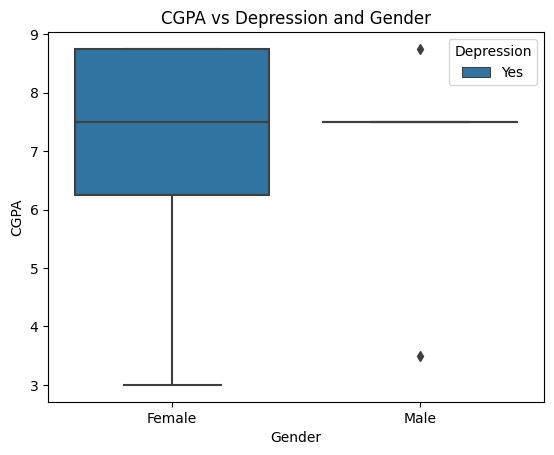

In [128]:
sns.boxplot(x='Gender', y='CGPA', data=depression_data, hue='Depression')
plt.title('CGPA vs Depression and Gender')
plt.show()


In [129]:
depressed_women = data[(data['Depression'] == 'Yes') & (data['Gender'] == 'Female')]
depressed_men = data[(data['Depression'] == 'Yes') & (data['Gender'] == 'Male')]

# Perform a t-test to compare the means of CGPA for depressed women and depressed men
t_stat, p_value = ttest_ind(depressed_women['CGPA'], depressed_men['CGPA'])

if p_value < 0.05:
    print(f'There is a statistically significant difference in CGPA between depressed women and depressed men (p-value: {p_value}).')
else:
    print(f'There is no statistically significant difference in CGPA between depressed women and depressed men (p-value: {p_value}).')

There is no statistically significant difference in CGPA between depressed women and depressed men (p-value: 0.8281599683278501).
